# Pharmaceutical Sales prediction across multiple stores

In [2]:
#import necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import logging

import warnings
warnings.simplefilter('ignore')

C:\Users\zefa-n\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#import data
train_df=pd.read_csv('./data/rossmann-store-sales/train.csv')
store_df=pd.read_csv('./data/rossmann-store-sales/store.csv')
test_df=pd.read_csv('./data/rossmann-store-sales/test.csv')
# df3=pd.read_csv('./data/rossmann-store-sales/sample_submission.csv')


# Data Cleaning

### Train Dataset

In [4]:
#check for null values
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
#Check for duplicates
train_df.duplicated().any()

False

In [6]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [9]:
train_df['StateHoliday']=train_df['StateHoliday'].apply(lambda x: '0' if x==0 else x)
# train_df['StateHoliday'].unique()

###### now the train dataset is clean

### Store Data

In [10]:
#check for null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
#Check for duplicates
store_df.duplicated().any()

False

In [12]:
#fix null values
# fill NaN with a median value for competition distance, fill the other NaN valuescolumns with 0
store_df['CompetitionDistance'].fillna(store_df.CompetitionDistance.median(), inplace=True)
store_df.fillna(0,inplace=True)
# store_df.isna().sum()

###### Store data is also cleaned, We can use for exploration

### Test Data

In [13]:
#check for null values
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [14]:
#Check for duplicates
test_df.duplicated().any()

False

###### fix missing value
We have 11 null values in the Open column, Since this column is sensitive information and the null values are few. 
It's better to drop the null columns 

In [15]:

#test_df[(test_df['Open'].isna()==True)]
test_df.dropna(inplace=True)
test_df.isnull().sum()
# test_df.shape

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# EDA
Here I'll try to answer the following questions in order to make effective exploration of insights
    - Check for distribution in both training and test sets - are the promotions distributed similarly between these two
                        groups?
    - Check & compare sales behavior before, during and after holidays
    - Find out any seasonal (Christmas, Easter etc) purchase behaviours,
    - What can you say about the correlation between sales and number of customers?
    - How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?
    - Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
    - Trends of customer behavior during store open and closing times
    - Which stores are opened on all weekdays? How does that affect their sales on weekends? 
    - Check how the assortment type affects sales
    - How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?
    - How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance


                        
     -


#### To answer the above questions and get better insights. let's merge the train and store datasets.

In [16]:
train_store_df=train_df.merge(store_df, on='Store')
train_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [17]:
#The rows where stores are closed and sales are not useful to get insights, drop them
train_store_df.drop(train_store_df[(train_store_df['Open']==0)&(train_store_df['Sales']==0)].index,inplace=True)
#Create Year,Month, Day columns from the Date column
train_store_df['Year']=train_store_df['Date'].apply(lambda x:x[0:4])
train_store_df['Month']=train_store_df['Date'].apply(lambda x:x[5:7])
train_store_df['Day']=train_store_df['Date'].apply(lambda x:x[8:10])
# train_store_df.head()

####  distribution in both training and test sets. are the promotions distributed similarly between these two groups?

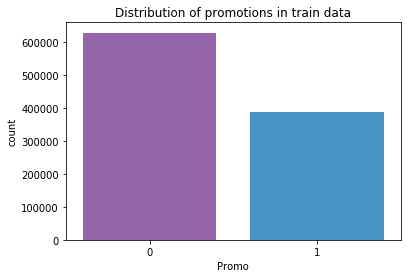

In [24]:
def dist_plot(df,x,title):
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    sns.countplot(x=x, data=df, palette = flatui).set_title(title)
dist_plot(train_df,'Promo','Distribution of promotions in train data')


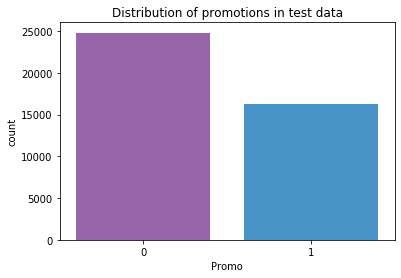

In [19]:
dist_plot(test_df,'Promo','Distribution of promotions in test data')

The promotions distributed similarly in both train and test datesets

#### Check & compare sales behavior before, during and after holidays

SchoolHoliday

Text(0.5, 1.0, 'sales across ordinary school days and school holidays')

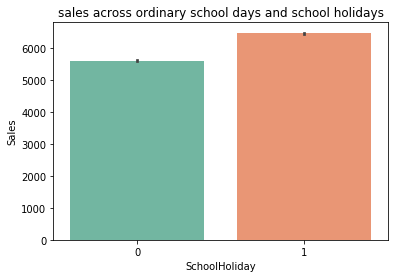

In [28]:
sns.barplot(x='SchoolHoliday', y='Sales', data=train_df, palette = 'Set2').set_title('sales across ordinary school days and school holidays')


StateHoliday

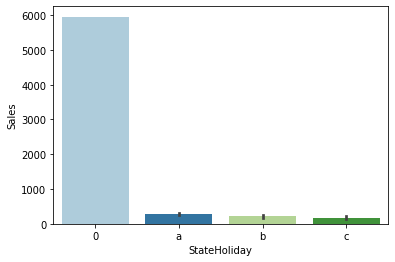

In [27]:
sns.barplot(x='StateHoliday', y='Sales', data=train_df, palette = 'Paired')

There are more sales during ordinary days than the school and state holidays

In [ ]:
#Find out any seasonal (Christmas, Easter etc) purchase behaviours,

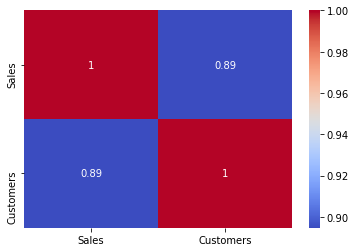

In [75]:
#What can you say about the correlation between sales and number of customers?
corr=train_df[['Sales','Customers']].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')

Sales and customers have 0.89 correlation. This implies the sales is highly dependent on the number of customers

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


<Figure size 864x504 with 0 Axes>

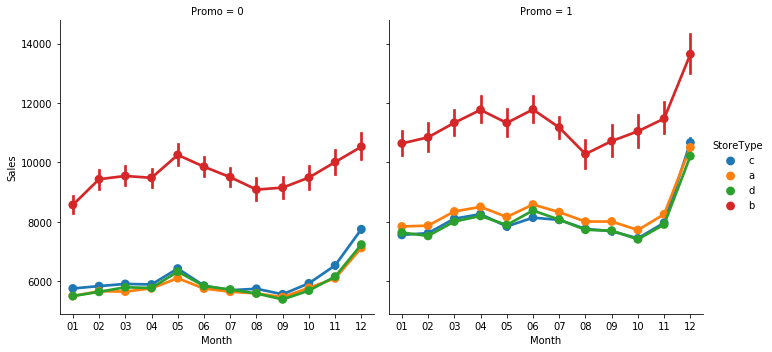

In [36]:
plt.figure(figsize=(10,8))
sns.factorplot(data = train_store_df, x ="Month", y = "Sales",col='Promo',hue = 'StoreType')
plt.show()

<Figure size 864x504 with 0 Axes>

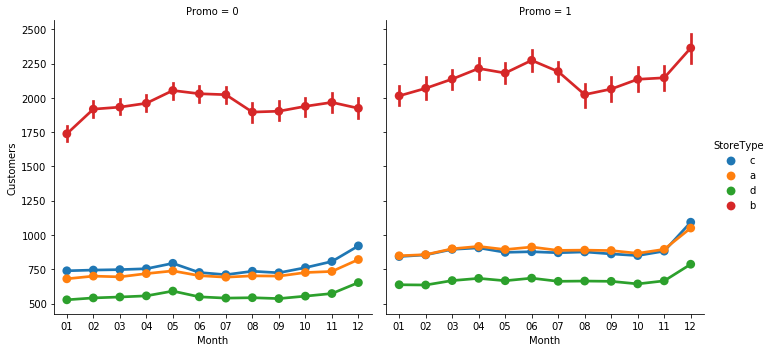

In [37]:
plt.figure(figsize=(10,8))
sns.factorplot(data = train_store_df, x ="Month", y = "Customers",col='Promo',hue = 'StoreType')

Deploying a promotion resulted in an increase in sales and number of customers in all store types 
Store Type b has the highest sales and customers per month  with and without the promo

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [50]:
# Which stores are opened on all weekdays? How does that affect their sales on weekends? 
# train_store_df['WeekDays']=np.where(train_store_df['DayOfWeek']<=5,1,0)
plt.figure(figsize=(12,8))
# sns.factorplot(data = train_store_df, x ='DayOfWeek', y = 'Sales',col='Open',hue = 'StoreType')


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

###  Check how the assortment type affects sales


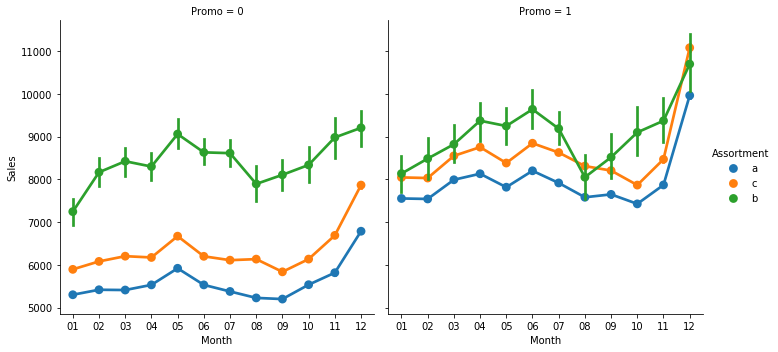

In [45]:
sns.factorplot(data = train_store_df, x ="Month", y = "Sales",col='Promo',hue = 'Assortment')

Basic assortment type has highest sales. Promotion increases the sales in all assortment types 

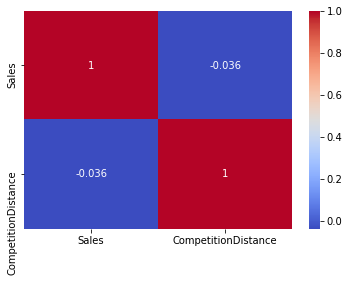

In [47]:
# - How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in 
# city centres,does the distance matter in that case?
corr=train_store_df[['Sales', 'CompetitionDistance']].corr()
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm')

The more the closer the stores the higher the sales, and the more the distant the lower the sales.